# Black Friday Dataset EDA and Feature Engineering
 Cleaning and Preparing data for model training

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# this is used for data parsing - skipinitialspace=True
train_df = pd.read_csv(r'datasets/BlackFriday/train.csv',skipinitialspace=True)
test_df =pd.read_csv(r'datasets/BlackFriday/test.csv',skipinitialspace=True)

In [7]:
#Merge the data
df = pd.concat([train_df, test_df], ignore_index=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [9]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [10]:
df.drop(['User_ID'],axis=1,inplace=True)

In [11]:
## handling the categorical features Gender
df['Gender']=df['Gender'].map({'F':0,'M':1})
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [12]:
## handling the categorical features Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
#get_dummies only show boolean type and dtype has to changed to int to show int values
#pd.get_dummies(df['Age'],dtype=int,drop_first=True)

# another way to handle categorical variables

df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True,dtype=int)
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [15]:
df2 = df.copy()
df2 = pd.concat([df2,df_city],axis=1)
df2

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [16]:
#drop City category
df2.drop('City_Category',axis=1,inplace=True)
df2

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [17]:
### Check missing values
df2.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
## focus on replacing missing values
df2['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [19]:
df2['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [20]:
## construction of mode of 'Product_Category_2'
df2['Product_Category_2'].mode()[0]

8.0

In [21]:
## replace the missing values with the mode of the data
df2['Product_Category_2']=df2['Product_Category_2'].fillna(df2['Product_Category_2'].mode()[0])
df2.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [22]:
## focus on replacing missing values of 'Product_Category_3'
df2['Product_Category_3'].unique()
df2['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [23]:
df2['Product_Category_3']=df2['Product_Category_3'].fillna(df2['Product_Category_3'].mode()[0])
df2.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [24]:
##stay in current city years
df2['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [25]:
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].str.replace('+','')
df2.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [26]:
##convert object into integers
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].astype(int)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


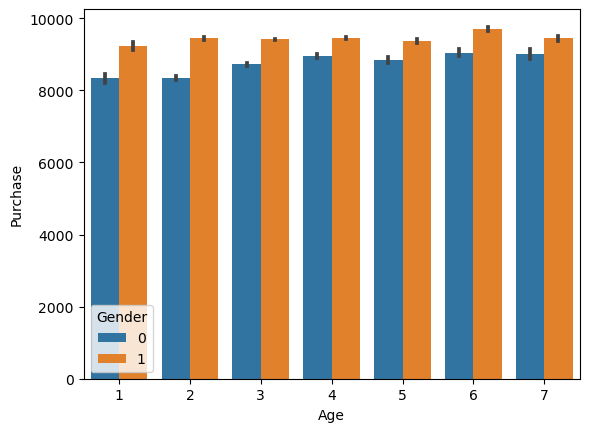

In [28]:
### Visulisation
sns.barplot(x='Age',y='Purchase',hue='Gender',data =df2 )
plt.show()

# Purchasing of men is high than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

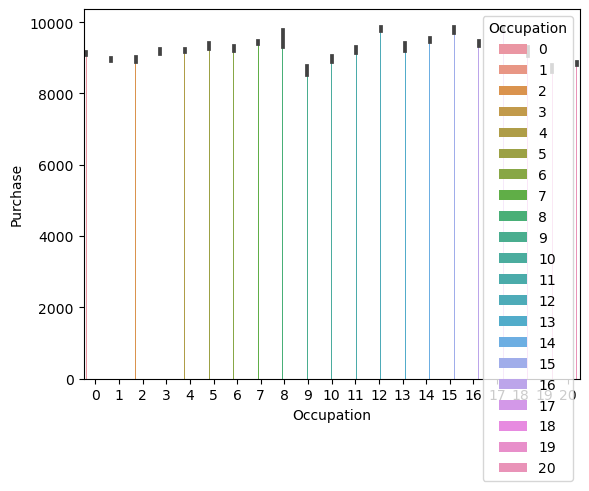

In [29]:
## Visualization of purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Occupation',data =df2 )

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

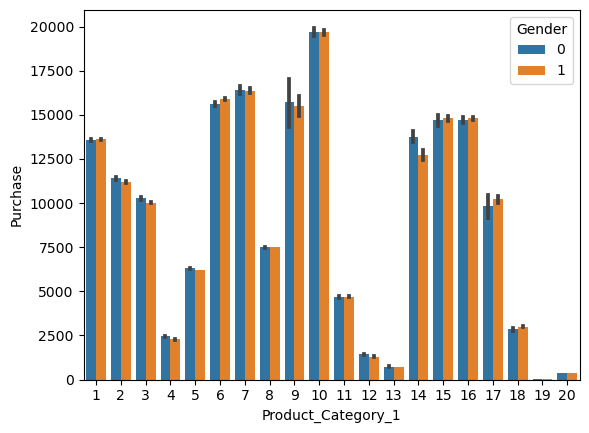

In [30]:
##'Product_Category_1' comparision with price

sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data =df2 )

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

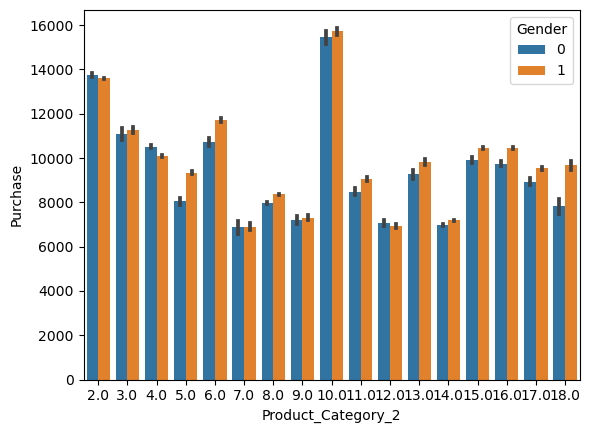

In [31]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data =df2 )

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

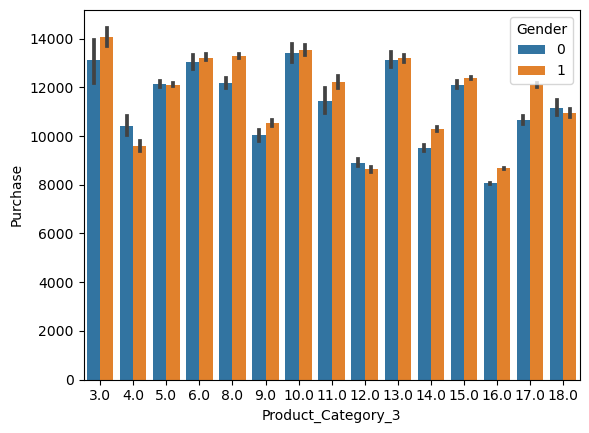

In [32]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data =df2 )

In [33]:
#Feature scaling
df_test = df2[df2['Purchase'].isnull()]

In [34]:
df_train= df2[~df2['Purchase'].isnull()]

In [35]:
X = df_train.drop(['Purchase'],axis=1)

In [36]:
X.shape

(550068, 11)

In [37]:
y = df_train['Purchase']

In [38]:
y.shape

(550068,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [40]:
X_train.drop(['Product_ID'],axis=1,inplace=True)
X_test.drop(['Product_ID'],axis=1,inplace=True)

In [41]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train_scaled = SC.fit_transform(X_train)
X_test_scaled = SC.transform(X_test)

In [ ]:
#train the data
